In [1]:
import pandas as pd

Models Used
1)Decision Tree Classifier-(hyperparameter, sample weights, class_weight)
2)Xgboost Classifier-(class weight and hyperparameter)
3)Bagging Classifier

Evaluation Metrics 
1)Accuracy score
2)Confusion Metrics
3)Classification matrix
4)Auc and ROC Curve


In [2]:
import pandas as pd

In [3]:
train_df=pd.read_csv('train_process_data.csv')#reading the  training csv file
train_df

,Unnamed: 0,Id,OrgId,IncidentId,AlertId,DetectorId,DeviceId,AccountSid,AccountUpn,AccountObjectId,NetworkMessageId,RegistryKey,ApplicationId,FolderPath,OSFamily,RegistryValueName_635,CountryCode_242,Year_2024,OSVersion_66,IncidentGrade
0,0,1786,0,612,123247,7,98799,441377,673934,425863,529644,1631,2251,117668,5,1.0,0.0,1.0,1.0,2
1,1,1492,88,326,210035,58,98799,22406,23032,22795,529644,1631,2251,117668,5,1.0,1.0,1.0,1.0,1
2,2,2573,809,58352,712507,423,98799,441377,673934,425863,529644,1631,2251,117668,5,1.0,1.0,1.0,1.0,1
3,3,4528,92,32992,774301,2,98799,441377,673934,425863,529644,1631,2251,117668,5,1.0,1.0,1.0,1.0,0
4,4,3722,148,4359,188041,9,98799,449,592,440,529644,1631,2251,117668,5,1.0,1.0,1.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9442951,9442951,1806,0,90,496631,7,98799,441377,673934,425863,529644,1631,2251,117668,5,1.0,1.0,1.0,1.0,2
9442952,9442952,3377,59,196410,748366,2,98799,441377,673934,425863,529644,1631,2251,117668,5,1.0,1.0,1.0,1.0,0
9442953,9442953,1330,44,14117,7425,78,98799,441377,270,425863,22919,1631,2251,117668,5,1.0,1.0,1.0,1.0,0
9442954,9442954,618,43,644,8973,52,98799,441377,673934,425863,529644,1631,2251,117668,5,1.0,1.0,1.0,1.0,0


In [4]:
train_df.drop('Unnamed: 0',axis=1,inplace=True)#dropping the unwanted columns

In [5]:
test_df=pd.read_csv('test_data_process.csv')#reading the test dataset
test_df

,Unnamed: 0,Id,OrgId,IncidentId,AlertId,DetectorId,DeviceId,AccountSid,AccountUpn,AccountObjectId,NetworkMessageId,RegistryKey,ApplicationId,FolderPath,OSFamily,RegistryValueName_635,CountryCode_242,Year_2024,OSVersion_66,IncidentGrade
0,0,3390,657,11767,87199,524,98799,2610,3699,425863,529644,1631,2251,117668,5,1.0,1.0,1.0,1.0,0
1,1,3658,3,91158,632273,2,1239,441377,673934,425863,529644,1631,2251,117668,0,1.0,1.0,1.0,0.0,0
2,2,1715,145,32247,131719,2932,98799,441377,673934,425863,529644,1631,2251,22,5,1.0,1.0,1.0,1.0,0
3,3,5148,222,15294,917686,0,98799,441377,673934,425863,529644,1631,2251,117668,5,1.0,1.0,1.0,1.0,1
4,4,5019,363,7615,5944,27,98799,133549,673934,425863,529644,1631,2251,117668,5,1.0,1.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3922690,3922690,624,42,391,638112,135,4,441377,673934,425863,529644,1631,2251,117668,0,1.0,1.0,1.0,0.0,0
3922691,3922691,1849,262,3017,227156,139,98799,13354,13012,13489,529644,1631,2251,117668,5,1.0,1.0,1.0,1.0,0
3922692,3922692,2761,1323,31001,304819,219,98799,95744,172717,96809,529644,1631,2251,117668,5,1.0,1.0,1.0,1.0,0
3922693,3922693,1095,47,3653,7243,57,98799,441377,673934,425863,529644,1631,2251,117668,5,1.0,1.0,1.0,1.0,1


In [6]:
test_df.drop(['Unnamed: 0'],axis=1,inplace=True)#removing the unwanteed column

In [7]:
#splitting into training and testing from both datasets
X_train=train_df.drop('IncidentGrade',axis=1)
y_train=train_df['IncidentGrade']
X_test=test_df.drop('IncidentGrade',axis=1)
y_test=test_df['IncidentGrade']

In [8]:
#scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)


1)Decision Tree Classifier 

Accuracy for training data: 100.00%
Accuracy for testing set: 89.36%
Confusion Matrix (Validation Set):
[[1495504   85718   49720]
 [  93679  714732   60486]
 [  81347   46525 1294984]]
Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.90      0.92      0.91   1630942
           1       0.84      0.82      0.83    868897
           2       0.92      0.91      0.92   1422856

    accuracy                           0.89   3922695
   macro avg       0.89      0.88      0.88   3922695
weighted avg       0.89      0.89      0.89   3922695



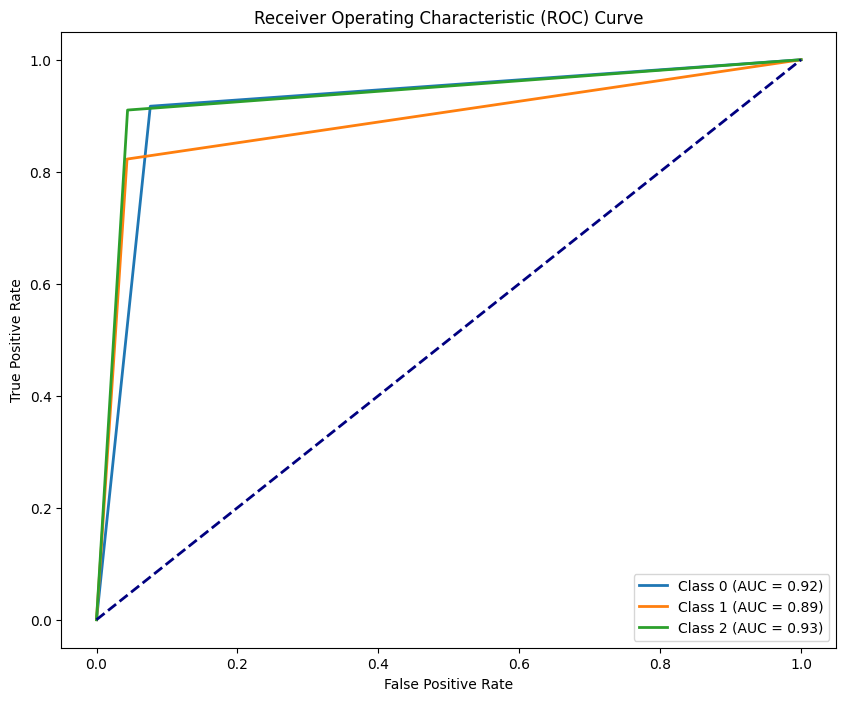

In [14]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize


# Calculate class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
sample_weights = np.array([class_weights[i] for i in y_train])

# Create and train the XGBoost classifier
model =DecisionTreeClassifier(random_state=42,class_weight='balanced')
model.fit(X_train_scaled, y_train, sample_weight=sample_weights)

y_train_pred = model.predict(X_train_scaled)
accuracy = accuracy_score(y_train, y_train_pred)
print(f"Accuracy for training data: {accuracy * 100:.2f}%")

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for testing set: {accuracy * 100:.2f}%")

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Validation Set):")
print(result)

result1 = classification_report(y_test, y_pred)
print("Classification Report (Validation Set):")
print(result1)

y_train_bin = label_binarize(y_test, classes=[0, 1, 2])  # Adjust class labels
y_pred_prob = model.predict_proba(X_test_scaled)

# Initialize the plot
plt.figure(figsize=(10, 8))

# Compute ROC curve and ROC area for each class
for i in range(3):  # Assuming 3 classes
    fpr, tpr, _ = roc_curve(y_train_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plotting the diagonal line (no-skill line)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Adding labels and title
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

# Display the plot
plt.show()

2)Decision Tree Classifier (with max depth)

Accuracy for training data: 80.22%
Accuracy for testing set: 77.81%
Confusion Matrix (Validation Set):
[[1189334  398635   42973]
 [  48716  759946   60235]
 [ 116974  202894 1102988]]
Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.88      0.73      0.80   1630942
           1       0.56      0.87      0.68    868897
           2       0.91      0.78      0.84   1422856

    accuracy                           0.78   3922695
   macro avg       0.78      0.79      0.77   3922695
weighted avg       0.82      0.78      0.79   3922695



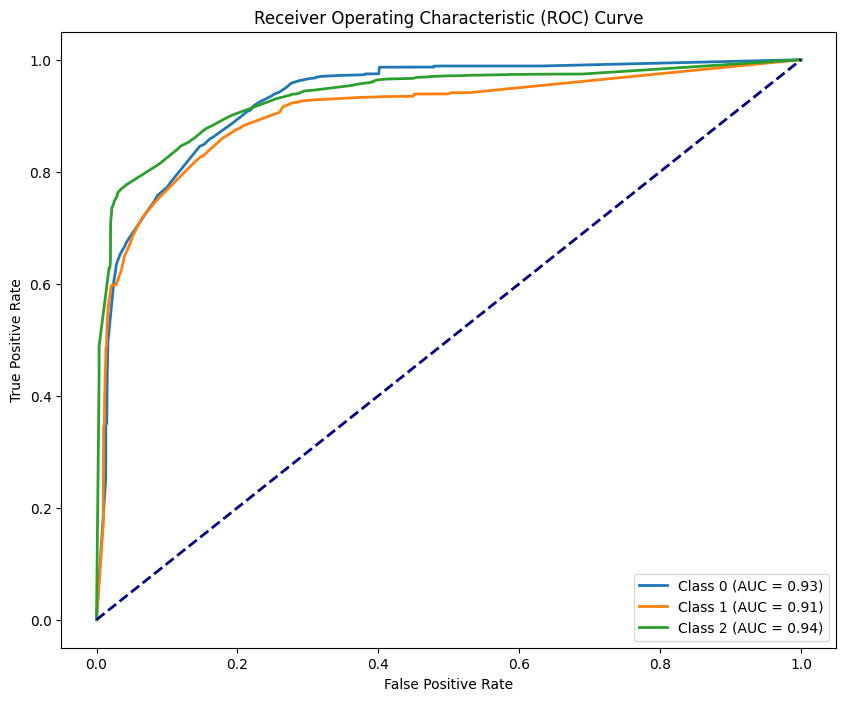

In [15]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize


# Calculate class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
sample_weights = np.array([class_weights[i] for i in y_train])

# Create and train the XGBoost classifier
model =DecisionTreeClassifier(random_state=42,class_weight='balanced',max_depth=15)
model.fit(X_train_scaled, y_train, sample_weight=sample_weights)

y_train_pred = model.predict(X_train_scaled)
accuracy = accuracy_score(y_train, y_train_pred)
print(f"Accuracy for training data: {accuracy * 100:.2f}%")

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for testing set: {accuracy * 100:.2f}%")

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Validation Set):")
print(result)

result1 = classification_report(y_test, y_pred)
print("Classification Report (Validation Set):")
print(result1)

y_train_bin = label_binarize(y_test, classes=[0, 1, 2])  # Adjust class labels
y_pred_prob = model.predict_proba(X_test_scaled)

# Initialize the plot
plt.figure(figsize=(10, 8))

# Compute ROC curve and ROC area for each class
for i in range(3):  # Assuming 3 classes
    fpr, tpr, _ = roc_curve(y_train_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plotting the diagonal line (no-skill line)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Adding labels and title
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

# Display the plot
plt.show()

3)Decision Tree classfier-with sample weights

Accuracy for training data: 85.87%
Accuracy for testing set: 83.34%
Confusion Matrix (Validation Set):
[[1384544  155065   91333]
 [ 127993  707796   33108]
 [ 133234  112777 1176845]]
Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.84      0.85      0.85   1630942
           1       0.73      0.81      0.77    868897
           2       0.90      0.83      0.86   1422856

    accuracy                           0.83   3922695
   macro avg       0.82      0.83      0.83   3922695
weighted avg       0.84      0.83      0.83   3922695



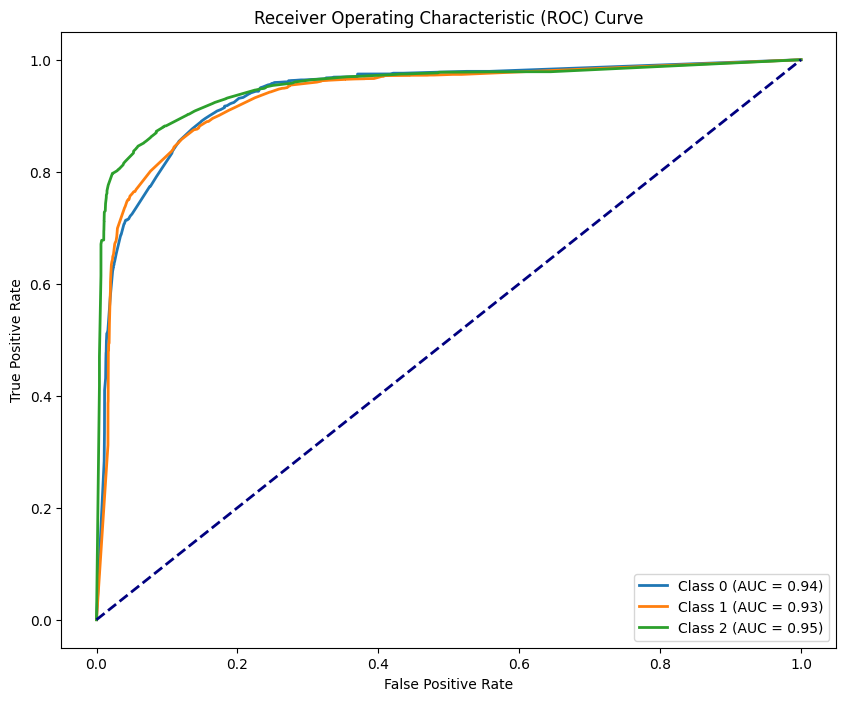

In [16]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize


# Calculate class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
sample_weights = np.array([class_weights[i] for i in y_train])

# Create and train the XGBoost classifier
model =DecisionTreeClassifier(random_state=42,max_depth=15)
model.fit(X_train_scaled, y_train, sample_weight=sample_weights)

y_train_pred = model.predict(X_train_scaled)
accuracy = accuracy_score(y_train, y_train_pred)
print(f"Accuracy for training data: {accuracy * 100:.2f}%")

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for testing set: {accuracy * 100:.2f}%")

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Validation Set):")
print(result)

result1 = classification_report(y_test, y_pred)
print("Classification Report (Validation Set):")
print(result1)

y_train_bin = label_binarize(y_test, classes=[0, 1, 2])  # Adjust class labels
y_pred_prob = model.predict_proba(X_test_scaled)

# Initialize the plot
plt.figure(figsize=(10, 8))

# Compute ROC curve and ROC area for each class
for i in range(3):  # Assuming 3 classes
    fpr, tpr, _ = roc_curve(y_train_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plotting the diagonal line (no-skill line)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Adding labels and title
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

# Display the plot
plt.show()

4)Desision Tree with balanced class weight

Accuracy for training data: 85.87%
Accuracy for testing set: 83.34%
Confusion Matrix (Validation Set):
[[1384544  155065   91333]
 [ 127993  707796   33108]
 [ 133234  112777 1176845]]
Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.84      0.85      0.85   1630942
           1       0.73      0.81      0.77    868897
           2       0.90      0.83      0.86   1422856

    accuracy                           0.83   3922695
   macro avg       0.82      0.83      0.83   3922695
weighted avg       0.84      0.83      0.83   3922695



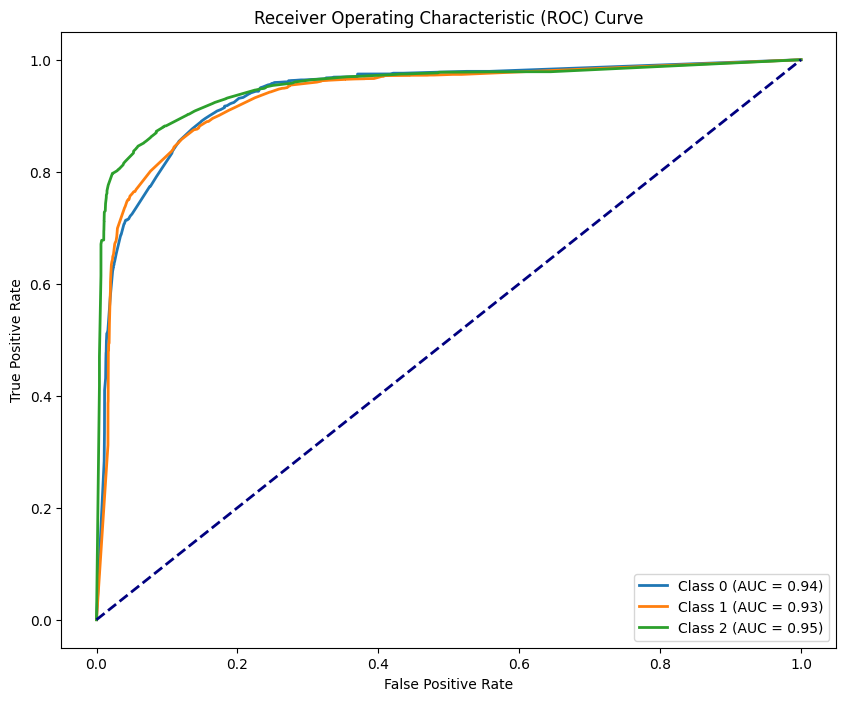

In [17]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize


# # Calculate class weights
# class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
# sample_weights = np.array([class_weights[i] for i in y_train])

# Create and train the XGBoost classifier
model =DecisionTreeClassifier(random_state=42,max_depth=15,class_weight='balanced')
model.fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)
accuracy = accuracy_score(y_train, y_train_pred)
print(f"Accuracy for training data: {accuracy * 100:.2f}%")

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for testing set: {accuracy * 100:.2f}%")

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Validation Set):")
print(result)

result1 = classification_report(y_test, y_pred)
print("Classification Report (Validation Set):")
print(result1)

y_train_bin = label_binarize(y_test, classes=[0, 1, 2])  # Adjust class labels
y_pred_prob = model.predict_proba(X_test_scaled)

# Initialize the plot
plt.figure(figsize=(10, 8))

# Compute ROC curve and ROC area for each class
for i in range(3):  # Assuming 3 classes
    fpr, tpr, _ = roc_curve(y_train_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plotting the diagonal line (no-skill line)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Adding labels and title
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

# Display the plot
plt.show()

Accuracy for training data: 85.87%
Accuracy for testing set: 83.34%
Confusion Matrix (Validation Set):
[[1384544  155065   91333]
 [ 127993  707796   33108]
 [ 133234  112777 1176845]]
Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.84      0.85      0.85   1630942
           1       0.73      0.81      0.77    868897
           2       0.90      0.83      0.86   1422856

    accuracy                           0.83   3922695
   macro avg       0.82      0.83      0.83   3922695
weighted avg       0.84      0.83      0.83   3922695



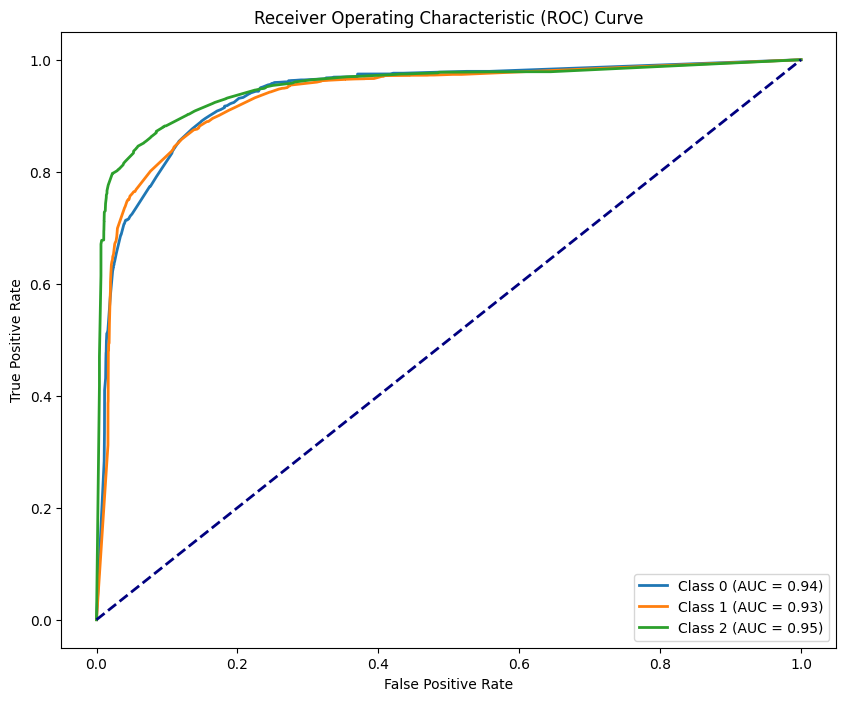

In [13]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize


# # Calculate class weights
# class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
# sample_weights = np.array([class_weights[i] for i in y_train])

# Create and train the XGBoost classifier
model =DecisionTreeClassifier(random_state=42,class_weight='balanced',max_depth=15)
model.fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)
accuracy = accuracy_score(y_train, y_train_pred)
print(f"Accuracy for training data: {accuracy * 100:.2f}%")

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for testing set: {accuracy * 100:.2f}%")

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Validation Set):")
print(result)

result1 = classification_report(y_test, y_pred)
print("Classification Report (Validation Set):")
print(result1)

y_train_bin = label_binarize(y_test, classes=[0, 1, 2])  # Adjust class labels
y_pred_prob = model.predict_proba(X_test_scaled)

# Initialize the plot
plt.figure(figsize=(10, 8))

# Compute ROC curve and ROC area for each class
for i in range(3):  # Assuming 3 classes
    fpr, tpr, _ = roc_curve(y_train_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plotting the diagonal line (no-skill line)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Adding labels and title
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

# Display the plot
plt.show()

5)Xgboost Classifier-sample weights

Accuracy for training data: 91.93%
Accuracy for training set: 89.66%
Confusion Matrix (Validation Set):
[[1440693  146994   43255]
 [  53431  791423   24043]
 [  65311   72691 1284854]]
Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.92      0.88      0.90   1630942
           1       0.78      0.91      0.84    868897
           2       0.95      0.90      0.93   1422856

    accuracy                           0.90   3922695
   macro avg       0.89      0.90      0.89   3922695
weighted avg       0.90      0.90      0.90   3922695



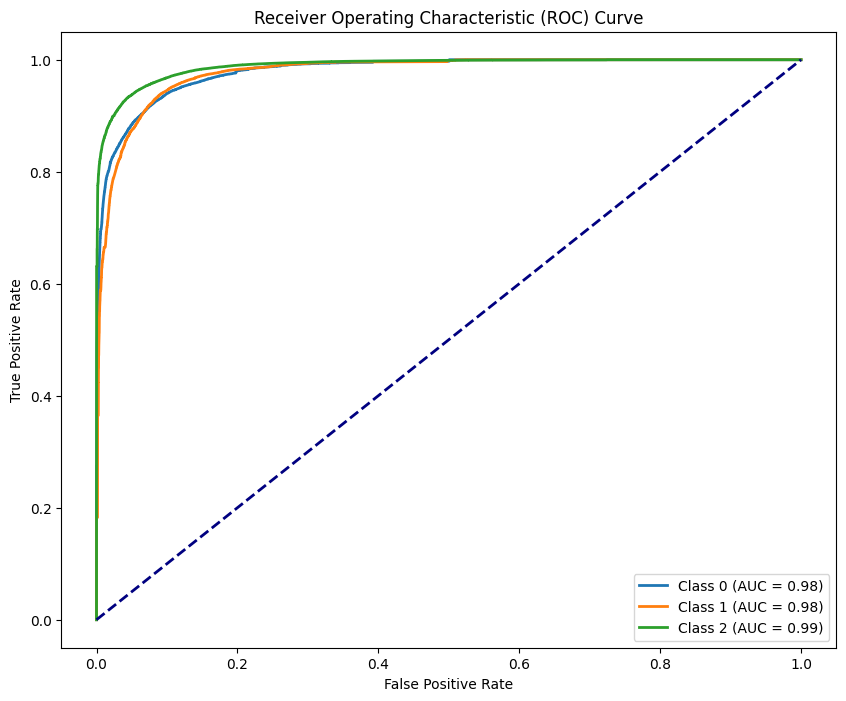

In [18]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
import xgboost as xgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize


# Calculate class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
sample_weights = np.array([class_weights[i] for i in y_train])

# Create and train the XGBoost classifier
model = xgb.XGBClassifier(objective='multi:softmax', num_class=3,  eval_metric='mlogloss')
model.fit(X_train_scaled, y_train, sample_weight=sample_weights)
y_train_pred = model.predict(X_train_scaled)
y_pred = model.predict(X_test_scaled)


accuracy = accuracy_score(y_train, y_train_pred)
print(f"Accuracy for training data: {accuracy * 100:.2f}%")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for training set: {accuracy * 100:.2f}%")

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Validation Set):")
print(result)

result1 = classification_report(y_test, y_pred)
print("Classification Report (Validation Set):")
print(result1)

y_train_bin = label_binarize(y_test, classes=[0, 1, 2])  # Adjust class labels
y_pred_prob = model.predict_proba(X_test_scaled)

# Initialize the plot
plt.figure(figsize=(10, 8))

# Compute ROC curve and ROC area for each class
for i in range(3):  # Assuming 3 classes
    fpr, tpr, _ = roc_curve(y_train_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plotting the diagonal line (no-skill line)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Adding labels and title
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

# Display the plot
plt.show()

6)Xgboost Classifier- class weights balanced

c:\Users\Dharshinee R\Desktop\Microsoft\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:26:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy for training data: 92.22%
Accuracy for training set: 89.80%
Confusion Matrix (Validation Set):
[[1511363   79506   40073]
 [ 106076  716413   46408]
 [  91739   36356 1294761]]
Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.88      0.93      0.90   1630942
           1       0.86      0.82      0.84    868897
           2       0.94      0.91      0.92   1422856

    accuracy                           0.90   3922695
   macro avg       0.89      0.89      0.89   3922695
weighted avg       0.90      0.90      0.90   3922695



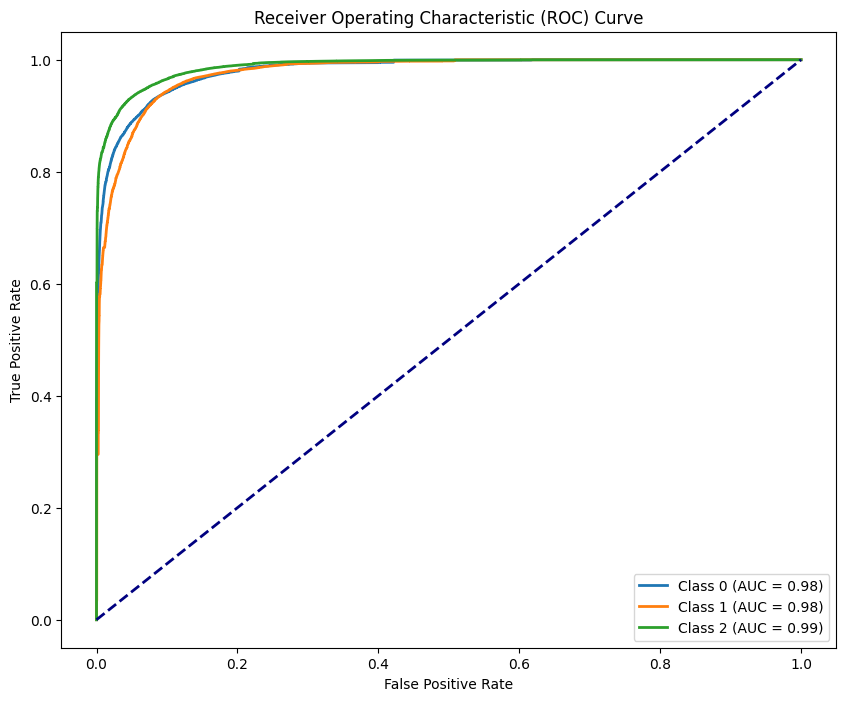

In [19]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
import xgboost as xgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize


# # Calculate class weights
# class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
# sample_weights = np.array([class_weights[i] for i in y_train])

# Create and train the XGBoost classifier
model = xgb.XGBClassifier(objective='multi:softmax', num_class=3,  eval_metric='mlogloss',class_weight='balanced')
model.fit(X_train_scaled, y_train)
y_train_pred = model.predict(X_train_scaled)
y_pred = model.predict(X_test_scaled)


accuracy = accuracy_score(y_train, y_train_pred)
print(f"Accuracy for training data: {accuracy * 100:.2f}%")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for training set: {accuracy * 100:.2f}%")

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Validation Set):")
print(result)

result1 = classification_report(y_test, y_pred)
print("Classification Report (Validation Set):")
print(result1)

y_train_bin = label_binarize(y_test, classes=[0, 1, 2])  # Adjust class labels
y_pred_prob = model.predict_proba(X_test_scaled)

# Initialize the plot
plt.figure(figsize=(10, 8))

# Compute ROC curve and ROC area for each class
for i in range(3):  # Assuming 3 classes
    fpr, tpr, _ = roc_curve(y_train_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plotting the diagonal line (no-skill line)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Adding labels and title
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

# Display the plot
plt.show()

7)Xgboost with sample weights

Accuracy for training data: 76.58%
Accuracy for training set: 76.47%
Confusion Matrix (Validation Set):
[[1402550  183089   45303]
 [ 276388  584351    8158]
 [ 305840  104264 1012752]]
Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.71      0.86      0.78   1630942
           1       0.67      0.67      0.67    868897
           2       0.95      0.71      0.81   1422856

    accuracy                           0.76   3922695
   macro avg       0.78      0.75      0.75   3922695
weighted avg       0.79      0.76      0.77   3922695



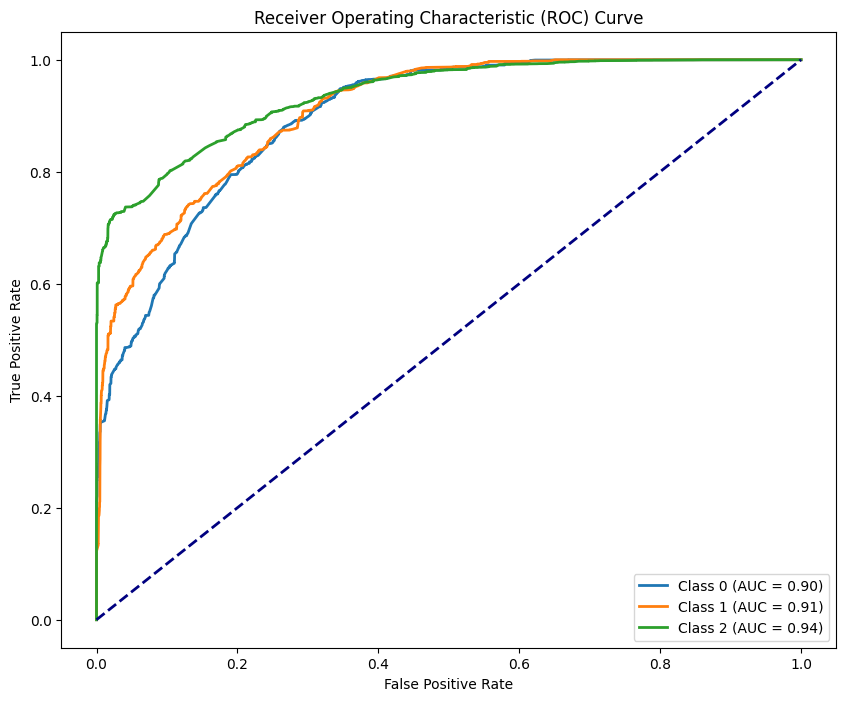

In [20]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
import xgboost as xgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize


# Calculate class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
sample_weights = np.array([class_weights[i] for i in y_train])

# Create and train the XGBoost classifier
model = xgb.XGBClassifier(objective='multi:softmax', num_class=3,  eval_metric='mlogloss',learning_rate=0.01)
model.fit(X_train_scaled, y_train, sample_weight=sample_weights)
y_train_pred = model.predict(X_train_scaled)
y_pred = model.predict(X_test_scaled)


accuracy = accuracy_score(y_train, y_train_pred)
print(f"Accuracy for training data: {accuracy * 100:.2f}%")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for training set: {accuracy * 100:.2f}%")

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Validation Set):")
print(result)

result1 = classification_report(y_test, y_pred)
print("Classification Report (Validation Set):")
print(result1)

y_train_bin = label_binarize(y_test, classes=[0, 1, 2])  # Adjust class labels
y_pred_prob = model.predict_proba(X_test_scaled)

# Initialize the plot
plt.figure(figsize=(10, 8))

# Compute ROC curve and ROC area for each class
for i in range(3):  # Assuming 3 classes
    fpr, tpr, _ = roc_curve(y_train_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plotting the diagonal line (no-skill line)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Adding labels and title
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

# Display the plot
plt.show()

8)Bagging classifier with hyperparameters of max_depth and min_samples_split

Accuracy for training data: 37.24%
Accuracy for training set: 39.47%
Confusion Matrix (Testing Set):
[[ 176555 1454387       0]
 [     31  868742     124]
 [     45  919803  503008]]
Classification Report (Testing Set):
              precision    recall  f1-score   support

           0       1.00      0.11      0.20   1630942
           1       0.27      1.00      0.42    868897
           2       1.00      0.35      0.52   1422856

    accuracy                           0.39   3922695
   macro avg       0.76      0.49      0.38   3922695
weighted avg       0.84      0.39      0.36   3922695



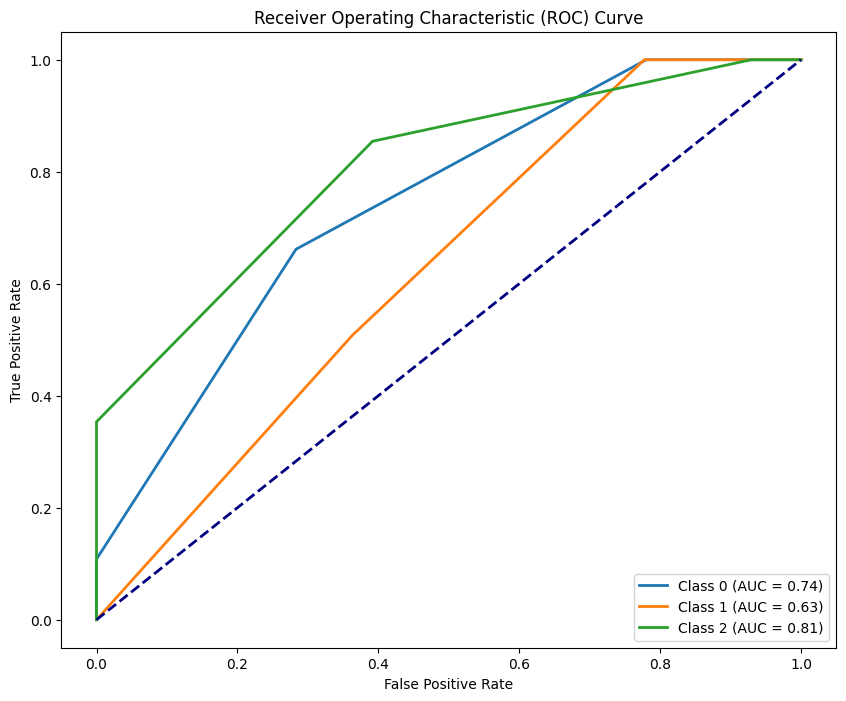

In [28]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.ensemble import BaggingClassifier

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize


# Calculate class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
sample_weights = np.array([class_weights[i] for i in y_train])

# Create and train the XGBoost classifier
estimator=DecisionTreeClassifier(random_state=42,class_weight='balanced',max_depth = 3,min_samples_split = 10 )
model = BaggingClassifier(estimator=estimator, n_estimators=10)
model.fit(X_train_scaled, y_train, sample_weight=sample_weights)
y_train_pred = model.predict(X_train_scaled)
y_pred = model.predict(X_test_scaled)


accuracy = accuracy_score(y_train, y_train_pred)
print(f"Accuracy for training data: {accuracy * 100:.2f}%")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for training set: {accuracy * 100:.2f}%")

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Testing Set):")
print(result)

result1 = classification_report(y_test, y_pred)
print("Classification Report (Testing Set):")
print(result1)

y_train_bin = label_binarize(y_test, classes=[0, 1, 2])  # Adjust class labels
y_pred_prob = model.predict_proba(X_test_scaled)

# Initialize the plot
plt.figure(figsize=(10, 8))

# Compute ROC curve and ROC area for each class
for i in range(3):  # Assuming 3 classes
    fpr, tpr, _ = roc_curve(y_train_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plotting the diagonal line (no-skill line)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Adding labels and title
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

# Display the plot
plt.show()

9)Bagging classifier with no hyperparameters

Accuracy for training data: 99.99%
Accuracy for training set: 90.71%
Confusion Matrix (Testing Set):
[[1507338   60458   63146]
 [  74705  754498   39694]
 [  69243   57229 1296384]]
Classification Report (Testing Set):
              precision    recall  f1-score   support

           0       0.91      0.92      0.92   1630942
           1       0.87      0.87      0.87    868897
           2       0.93      0.91      0.92   1422856

    accuracy                           0.91   3922695
   macro avg       0.90      0.90      0.90   3922695
weighted avg       0.91      0.91      0.91   3922695



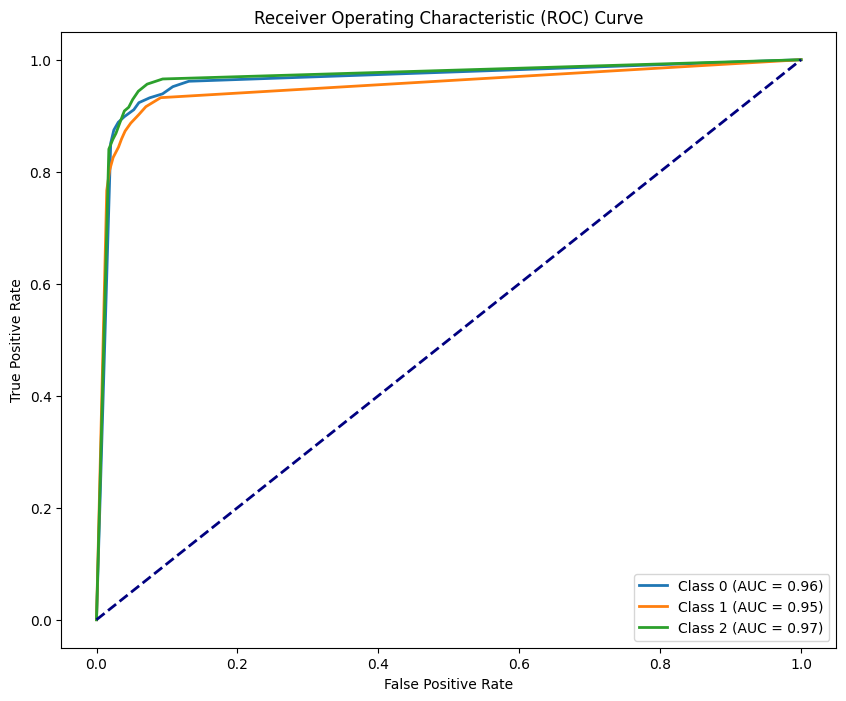

In [29]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.ensemble import BaggingClassifier

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize




# Create and train the XGBoost classifier
estimator=DecisionTreeClassifier(random_state=42,class_weight='balanced')
model = BaggingClassifier(estimator=estimator, n_estimators=10)
model.fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)
y_pred = model.predict(X_test_scaled)


accuracy = accuracy_score(y_train, y_train_pred)#accuracy for training data
print(f"Accuracy for training data: {accuracy * 100:.2f}%")

accuracy = accuracy_score(y_test, y_pred)#accuracy for testing data
print(f"Accuracy for training set: {accuracy * 100:.2f}%")

result = confusion_matrix(y_test, y_pred)#confusion matrix for testing data
print("Confusion Matrix (Testing Set):")
print(result)

result1 = classification_report(y_test, y_pred)
print("Classification Report (Testing Set):")
print(result1)

y_train_bin = label_binarize(y_test, classes=[0, 1, 2])  # Adjust class labels
y_pred_prob = model.predict_proba(X_test_scaled)

# Initialize the plot
plt.figure(figsize=(10, 8))

# Compute ROC curve and ROC area for each class
for i in range(3):  # Assuming 3 classes
    fpr, tpr, _ = roc_curve(y_train_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plotting the diagonal line 
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Adding labels and title
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

# Display the plot
plt.show()